# Background and Context:

Twitter possesses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other hand, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.

That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.


Listening to how customers feel about the product/service on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand and their competitors, and discover new trends in the industry.

 

# Data Description:

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").


# Dataset:

The dataset has the following columns:
- tweet_id                                                           
- airline_sentiment                                               
- airline_sentiment_confidence                               
- negativereason                                                   
- negativereason_confidence                                    
- airline                                                                    
- airline_sentiment_gold                                              
- name     
- negativereason_gold 
- retweet_count
- text
- tweet_coord
- tweet_created
- tweet_location 
- user_timezone

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_column', None)
sns.set()

import warnings
warnings.filterwarnings('ignore')

from wordcloud import WordCloud

# Import Data

In [2]:
airline = pd.read_csv('Tweets.csv')

In [3]:
df = airline.copy()

In [4]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
df.shape

(14640, 15)

- The dataset consists of 14640 rows and 15 columns.
- Missing values present in serveral columns.
- Features with ambiguous name like `airline_sentiment_gold` and `tweet_coord` may need further investigation to understand what they really mean.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

- Most columns are objects. Only `tweet_id`, `airline_sentiment_confidence`, `negativereason_confidence` and `retweet_count` are numbers.

## Check Missing Values

In [7]:
# show columns with missing values and the proportion of missing values
def check_missing_values():
    miss_df = pd.DataFrame(df.isnull().sum(), columns = ['# of missing values'])
    miss_df["% of missing values"] = np.round(miss_df['# of missing values']/ df.shape[0] * 100, 2)
    return  miss_df[miss_df["% of missing values"] > 0]

In [8]:
check_missing_values()

,# of missing values,% of missing values
negativereason,5462,37.31
negativereason_confidence,4118,28.13
airline_sentiment_gold,14600,99.73
negativereason_gold,14608,99.78
tweet_coord,13621,93.04
tweet_location,4733,32.33
user_timezone,4820,32.92


- Missing values in `airline_sentiment_gold`, `negativereason_gold`, `tweet_coord` account for 90+% of the total.
- Missing values in `negativereason`, `negativereason_confidence`, `tweet_location` and `user_timezone` account for about 30% of the total.

### Drop `airline_sentiment_gold`

In [9]:
df[df.airline_sentiment_gold.notnull()]  # check airline_sentiment_gold with values

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
1286,569851578276048896,negative,1.0000,Late Flight,0.7684,United,negative,MrEschatologist,Late Flight\nFlight Attendant Complaints,0,"@united I'm aware of the flight details, thank...",NaN,2015-02-23 05:29:38 -0800,"Arlington, VA",NaN
2017,569473998519578624,negative,1.0000,Late Flight,0.6048,United,negative,traceyabbywhite,Late Flight\nLost Luggage,0,@united flighted delayed for hours. 10pm arriv...,NaN,2015-02-22 04:29:16 -0800,"Atlantic Highlands, NJ",Eastern Time (US & Canada)
2135,569343661063823360,neutral,1.0000,NaN,NaN,United,neutral,aushianya,NaN,0,@united I have a question,NaN,2015-02-21 19:51:21 -0800,NaN,NaN
2201,569318505755103232,negative,1.0000,Late Flight,0.6478,United,negative,tarlonious,Late Flight,1,@united it's been over 3 hours...at what point...,NaN,2015-02-21 18:11:23 -0800,NaN,NaN
2383,569235954789015552,negative,0.9286,Customer Service Issue,0.9286,United,negative,screamingbrat,Customer Service Issue,0,@united You shouldn't page o'head that it's be...,NaN,2015-02-21 12:43:22 -0800,"new york, baby",Eastern Time (US & Canada)
3005,568802013196242944,negative,1.0000,Can't Tell,0.6870,United,negative,katieclaytonn,Can't Tell,0,@united couldn't have possibly messed up our t...,NaN,2015-02-20 07:59:02 -0800,NaN,Central Time (US & Canada)
3149,568637541513089024,negative,0.9220,Customer Service Issue,0.4513,United,negative,Mosborne13,Cancelled Flight\nCustomer Service Issue,0,@united rebooked 24 hours after original fligh...,NaN,2015-02-19 21:05:29 -0800,NaN,Central Time (US & Canada)
4206,567778009013178368,negative,1.0000,Cancelled Flight,1.0000,United,negative,realmikesmith,Cancelled Flight,0,@united So what do you offer now that my fligh...,"[26.37852293, -81.78472152]",2015-02-17 12:10:00 -0800,Chicago,Eastern Time (US & Canada)
4525,570066283233972224,positive,0.9657,NaN,0.0000,Southwest,positive,magmum03,NaN,0,@SouthwestAir What an awesome flight Dallas 2 ...,NaN,2015-02-23 19:42:47 -0800,ny,NaN
5183,569273733334077440,negative,1.0000,Customer Service Issue,0.7715,Southwest,negative,nealmo,Customer Service Issue,0,"@SouthwestAir also, gave up after 1 hr 32 min...",NaN,2015-02-21 15:13:29 -0800,NaN,Central Time (US & Canada)


In [10]:
np.all(df.loc[df.airline_sentiment_gold.notnull(), 'airline_sentiment_gold'] == df.loc[df.airline_sentiment_gold.notnull(), 'airline_sentiment'])

True

- `airline_sentiment_gold` is the replicate of `airline_sentiment`. We could drop `airline_sentiment_gold`.

In [11]:
df.drop(columns = ['airline_sentiment_gold'], inplace = True)

### Treat `negativereason` and `negativereason_gold`

In [12]:
valid_negativereasons = df[df.negativereason_gold.notnull()]  # check negativereason_gold with values
valid_negativereasons

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
1286,569851578276048896,negative,1.0000,Late Flight,0.7684,United,MrEschatologist,Late Flight\nFlight Attendant Complaints,0,"@united I'm aware of the flight details, thank...",NaN,2015-02-23 05:29:38 -0800,"Arlington, VA",NaN
2017,569473998519578624,negative,1.0000,Late Flight,0.6048,United,traceyabbywhite,Late Flight\nLost Luggage,0,@united flighted delayed for hours. 10pm arriv...,NaN,2015-02-22 04:29:16 -0800,"Atlantic Highlands, NJ",Eastern Time (US & Canada)
2201,569318505755103232,negative,1.0000,Late Flight,0.6478,United,tarlonious,Late Flight,1,@united it's been over 3 hours...at what point...,NaN,2015-02-21 18:11:23 -0800,NaN,NaN
2383,569235954789015552,negative,0.9286,Customer Service Issue,0.9286,United,screamingbrat,Customer Service Issue,0,@united You shouldn't page o'head that it's be...,NaN,2015-02-21 12:43:22 -0800,"new york, baby",Eastern Time (US & Canada)
3005,568802013196242944,negative,1.0000,Can't Tell,0.6870,United,katieclaytonn,Can't Tell,0,@united couldn't have possibly messed up our t...,NaN,2015-02-20 07:59:02 -0800,NaN,Central Time (US & Canada)
3149,568637541513089024,negative,0.9220,Customer Service Issue,0.4513,United,Mosborne13,Cancelled Flight\nCustomer Service Issue,0,@united rebooked 24 hours after original fligh...,NaN,2015-02-19 21:05:29 -0800,NaN,Central Time (US & Canada)
4206,567778009013178368,negative,1.0000,Cancelled Flight,1.0000,United,realmikesmith,Cancelled Flight,0,@united So what do you offer now that my fligh...,"[26.37852293, -81.78472152]",2015-02-17 12:10:00 -0800,Chicago,Eastern Time (US & Canada)
5183,569273733334077440,negative,1.0000,Customer Service Issue,0.7715,Southwest,nealmo,Customer Service Issue,0,"@SouthwestAir also, gave up after 1 hr 32 min...",NaN,2015-02-21 15:13:29 -0800,NaN,Central Time (US & Canada)
5341,569179898532761600,negative,1.0000,Customer Service Issue,0.9256,Southwest,HDTeem,Customer Service Issue,0,@SouthwestAir I've been on hold for over an ho...,NaN,2015-02-21 09:00:37 -0800,"Baton Rouge, LA",Central Time (US & Canada)
5810,568581908075933696,negative,0.9658,Bad Flight,0.6623,Southwest,abyrley,Bad Flight,1,@SouthwestAir please do something about the sp...,NaN,2015-02-19 17:24:25 -0800,"Raleigh, NC",NaN


In [13]:
for i, r in valid_negativereasons.iterrows():
    if r['negativereason'] not in r['negativereason_gold']:
        print(i)

12038


- In most cases, elements in `negativereason` are already included in `negativereason_gold`. Only at row 12038, the two don't overlap:

In [14]:
df[df.index == 12038]

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
12038,570294451261874177,negative,1.0,longlines,0.4686,Delta,DetroitRonin,Customer Service Issue,0,@DeltaAssist now at 57 minutes waiting on Silv...,NaN,2015-02-24 10:49:27 -0800,Thataway,Eastern Time (US & Canada)


In [15]:
df.negativereason.value_counts()

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

In [16]:
df.negativereason_gold.value_counts()

Customer Service Issue                      12
Late Flight                                  4
Cancelled Flight                             3
Can't Tell                                   3
Cancelled Flight\nCustomer Service Issue     2
Late Flight\nLost Luggage                    1
Customer Service Issue\nCan't Tell           1
Customer Service Issue\nLost Luggage         1
Flight Attendant Complaints                  1
Late Flight\nFlight Attendant Complaints     1
Lost Luggage\nDamaged Luggage                1
Late Flight\nCancelled Flight                1
Bad Flight                                   1
Name: negativereason_gold, dtype: int64

- Sometimes there're more than one issue that make customers unhappy. These elements in `negativereason_gold` are the combinations of the elements in `negativereason`.

**Merge two columns into one, stored in `negativereason`. Drop `negativereason_gold`.**

In [17]:
valid_negativereasons.loc[12038, 'negativereason_gold'] += '\n' + valid_negativereasons.loc[12038, 'negativereason']

for i, r in valid_negativereasons.iterrows():
    df.loc[i, 'negativereason'] = r['negativereason_gold']
    
df[df.index.isin(valid_negativereasons.index)]

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
1286,569851578276048896,negative,1.0000,Late Flight\nFlight Attendant Complaints,0.7684,United,MrEschatologist,Late Flight\nFlight Attendant Complaints,0,"@united I'm aware of the flight details, thank...",NaN,2015-02-23 05:29:38 -0800,"Arlington, VA",NaN
2017,569473998519578624,negative,1.0000,Late Flight\nLost Luggage,0.6048,United,traceyabbywhite,Late Flight\nLost Luggage,0,@united flighted delayed for hours. 10pm arriv...,NaN,2015-02-22 04:29:16 -0800,"Atlantic Highlands, NJ",Eastern Time (US & Canada)
2201,569318505755103232,negative,1.0000,Late Flight,0.6478,United,tarlonious,Late Flight,1,@united it's been over 3 hours...at what point...,NaN,2015-02-21 18:11:23 -0800,NaN,NaN
2383,569235954789015552,negative,0.9286,Customer Service Issue,0.9286,United,screamingbrat,Customer Service Issue,0,@united You shouldn't page o'head that it's be...,NaN,2015-02-21 12:43:22 -0800,"new york, baby",Eastern Time (US & Canada)
3005,568802013196242944,negative,1.0000,Can't Tell,0.6870,United,katieclaytonn,Can't Tell,0,@united couldn't have possibly messed up our t...,NaN,2015-02-20 07:59:02 -0800,NaN,Central Time (US & Canada)
3149,568637541513089024,negative,0.9220,Cancelled Flight\nCustomer Service Issue,0.4513,United,Mosborne13,Cancelled Flight\nCustomer Service Issue,0,@united rebooked 24 hours after original fligh...,NaN,2015-02-19 21:05:29 -0800,NaN,Central Time (US & Canada)
4206,567778009013178368,negative,1.0000,Cancelled Flight,1.0000,United,realmikesmith,Cancelled Flight,0,@united So what do you offer now that my fligh...,"[26.37852293, -81.78472152]",2015-02-17 12:10:00 -0800,Chicago,Eastern Time (US & Canada)
5183,569273733334077440,negative,1.0000,Customer Service Issue,0.7715,Southwest,nealmo,Customer Service Issue,0,"@SouthwestAir also, gave up after 1 hr 32 min...",NaN,2015-02-21 15:13:29 -0800,NaN,Central Time (US & Canada)
5341,569179898532761600,negative,1.0000,Customer Service Issue,0.9256,Southwest,HDTeem,Customer Service Issue,0,@SouthwestAir I've been on hold for over an ho...,NaN,2015-02-21 09:00:37 -0800,"Baton Rouge, LA",Central Time (US & Canada)
5810,568581908075933696,negative,0.9658,Bad Flight,0.6623,Southwest,abyrley,Bad Flight,1,@SouthwestAir please do something about the sp...,NaN,2015-02-19 17:24:25 -0800,"Raleigh, NC",NaN


In [18]:
df.drop(columns = ['negativereason_gold'], inplace = True)

In [19]:
check_missing_values()

,# of missing values,% of missing values
negativereason,5462,37.31
negativereason_confidence,4118,28.13
tweet_coord,13621,93.04
tweet_location,4733,32.33
user_timezone,4820,32.92


### Check the relation between `airline_sentiment` and `negativereason`, `negativereason_confidence`

In [20]:
df.loc[df.negativereason.isnull(), 'airline_sentiment'].value_counts()

neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [21]:
df.loc[df.negativereason_confidence.isnull(), 'airline_sentiment'].value_counts()

neutral     2085
positive    2033
Name: airline_sentiment, dtype: int64

- The missing values in `negativereason` and `negativereason_confidence` correspond to positive or neutral sentiment. So they're actually "N/A" rather than missing.


### Drop `tweet_coord`

In [22]:
df.tweet_coord.value_counts()

[0.0, 0.0]                     164
[40.64656067, -73.78334045]      6
[32.91792297, -97.00367737]      3
[40.64646912, -73.79133606]      3
[39.1766101, -76.6700606]        2
                              ... 
[41.45856783, -81.86763782]      1
[42.3613256, -71.0167387]        1
[29.98384925, -95.3374653]       1
[19.41622708, -99.16143525]      1
[40.51270596, -74.48509319]      1
Name: tweet_coord, Length: 832, dtype: int64

- `tweet_coord` shows the coordinates of the contributors. We could drop it.

In [23]:
df.drop(columns = ['tweet_coord'], inplace = True)

## Drop `tweet_id` and `name`
- `tweet_id` and `name` don't contain much useful information for our analysis. We could drop them.

In [24]:
df.drop(columns = ['tweet_id', 'name'], inplace = True)

## Check unique values

In [25]:
for col in df.columns:
    print(col, ":", df[col].nunique())

airline_sentiment : 3
airline_sentiment_confidence : 1023
negativereason : 18
negativereason_confidence : 1410
airline : 6
retweet_count : 18
text : 14427
tweet_created : 14247
tweet_location : 3081
user_timezone : 85


## Check `tweet_location`

In [26]:
list(df.tweet_location.unique()[:30])  # show the top 30 tweet locations

[nan,
 'Lets Play',
 'San Francisco CA',
 'Los Angeles',
 'San Diego',
 '1/1 loner squad',
 'NYC',
 'San Francisco, CA',
 'palo alto, ca',
 'west covina',
 'this place called NYC',
 'Somewhere celebrating life. ',
 'Boston | Waltham',
 'Boston, MA ',
 '714',
 'San Mateo, CA & Las Vegas, NV',
 'Brooklyn',
 'California, San Francisco',
 'Washington DC',
 'Texas',
 'Worldwide',
 'Central Texas',
 "i'm creating a monster ",
 'Iowa City',
 'Georgia',
 'Turks and caicos',
 'Oakland via Midwest ',
 'New York, NY',
 'Northern Virginia',
 'Los Angeles / Atlanta']

- Representations of `tweet_location` are flexible. Some are real geographic locations, while others are not. 
- Granularity of geographic locations is from borough/city to state/country. 

## Split `tweet_created` into year, month, day and hour

In [27]:
df['tweet_created'] = pd.to_datetime(df['tweet_created'])

In [28]:
df['year'] = df['tweet_created'].dt.year
df['month'] = df['tweet_created'].dt.month
df['day'] = df['tweet_created'].dt.day
df['hour'] = df['tweet_created'].dt.hour

In [29]:
df.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,retweet_count,text,tweet_created,tweet_location,user_timezone,year,month,day,hour
0,neutral,1.0000,NaN,NaN,Virgin America,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52-08:00,NaN,Eastern Time (US & Canada),2015,2,24,11
1,positive,0.3486,NaN,0.0000,Virgin America,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59-08:00,NaN,Pacific Time (US & Canada),2015,2,24,11
2,neutral,0.6837,NaN,NaN,Virgin America,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48-08:00,Lets Play,Central Time (US & Canada),2015,2,24,11
3,negative,1.0000,Bad Flight,0.7033,Virgin America,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36-08:00,NaN,Pacific Time (US & Canada),2015,2,24,11
4,negative,1.0000,Can't Tell,1.0000,Virgin America,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45-08:00,NaN,Pacific Time (US & Canada),2015,2,24,11


## Data description

In [30]:
df.describe(include = ['object'])

,airline_sentiment,negativereason,airline,text,tweet_location,user_timezone
count,14640,9178,14640,14640,9907,9820
unique,3,18,6,14427,3081,85
top,negative,Customer Service Issue,United,@united thanks,"Boston, MA",Eastern Time (US & Canada)
freq,9178,2908,3822,6,157,3744


In [31]:
df.describe()

,airline_sentiment_confidence,negativereason_confidence,retweet_count,year,month,day,hour
count,14640.000000,10522.000000,14640.000000,14640.0,14640.0,14640.000000,14640.000000
mean,0.900169,0.638298,0.082650,2015.0,2.0,20.947473,12.319945
std,0.162830,0.330440,0.745778,0.0,0.0,2.170646,5.306285
min,0.335000,0.000000,0.000000,2015.0,2.0,16.000000,0.000000
25%,0.692300,0.360600,0.000000,2015.0,2.0,19.000000,8.000000
50%,1.000000,0.670600,0.000000,2015.0,2.0,22.000000,12.000000
75%,1.000000,1.000000,0.000000,2015.0,2.0,23.000000,17.000000
max,1.000000,1.000000,44.000000,2015.0,2.0,24.000000,23.000000


- Most of the sentiments are negative.
- Customer Service Issue is the #1 complaint.
- Among six airlines, United appears most frequently.
- About 30% contributors are from Eastern Time (US & Canada) time zone.
- All the data was collected during 2015-2-16 to 2015-2-24.
- Most of the tweets don't get retweeted. But some outliers get as many as 44 retweets.

# EDA
## Univariate Analysis

In [32]:
num_categories = 40

def count_plotx(col, first_n):
    """
    Show a vertical countplot of the first_n categories.
    """
    if df[col].nunique() < num_categories:   # if number of categories < num_categories, display all of them. otherwise, only display first_n categories.
        first_n = df[col].nunique()
    ax = sns.countplot(x = df[col], order = df[col].value_counts().index[:first_n])
    for p in ax.patches:
        percent = np.round(p.get_height() / df.shape[0] * 100, 2)
        plt.annotate(str(percent) + '%', (p.get_x() + p.get_width()/2 - 0.2, p.get_y() + p.get_height()))
        
def count_ploty(col, first_n):
    """
    Show a horizontal countplot of the first_n categories.
    """    
    if df[col].nunique() < num_categories:   # if number of categories < num_categories, display all of them. otherwise, only display first_n categories.
        first_n = df[col].nunique()
    ax = sns.countplot(y = df[col], order = df[col].value_counts().index[:first_n])
    for p in ax.patches:
        percent = np.round(p.get_width() / df.shape[0] * 100, 2)
        plt.annotate(str(percent) + '%', (p.get_x() + p.get_width(), p.get_y() + p.get_height()/2))        

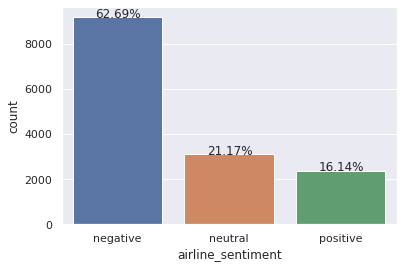

In [33]:
count_plotx('airline_sentiment', 0)

- Negative reviews account for 62.69%, followed by neutral reviews of 21.17%.

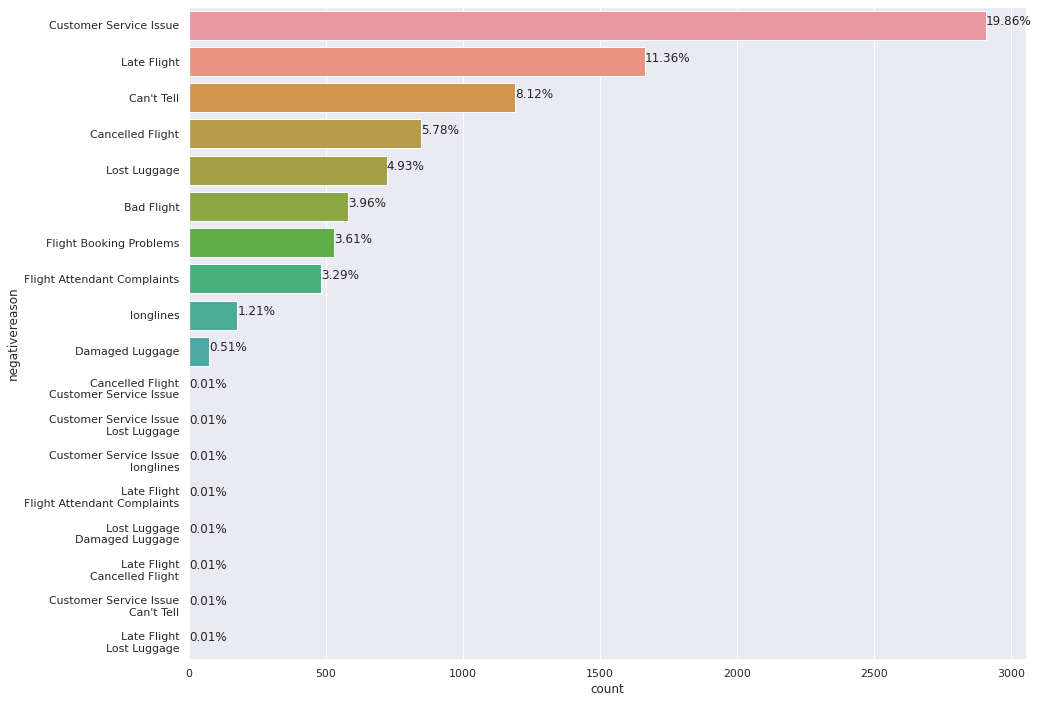

In [34]:
plt.figure(figsize = (15,12))
count_ploty('negativereason', 0)

- `Customer Service Issue` accounts for about 20% of negative reasons, followed by `Late Flight`. It's noticeable that the #3 negative reason is `Can't Tell`. It deserves further research on what it actually means. Maybe they don't feel comfortable with the service in many minor and subtle ways.
- Less than 1% complaints associate with multiple negative reasons.

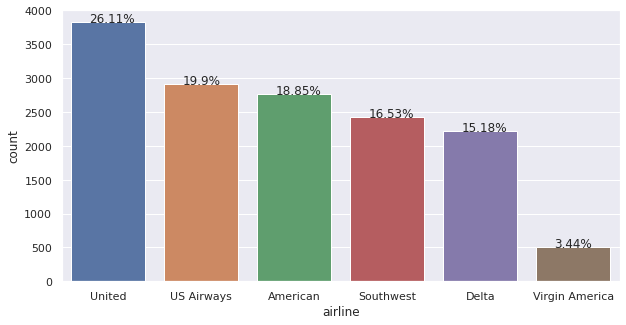

In [35]:
plt.figure(figsize = (10,5))
count_plotx('airline', 0)

- `United` accounts for 26.11%, followed by `US Airways` of 19.9% and `American` of 18.85%.

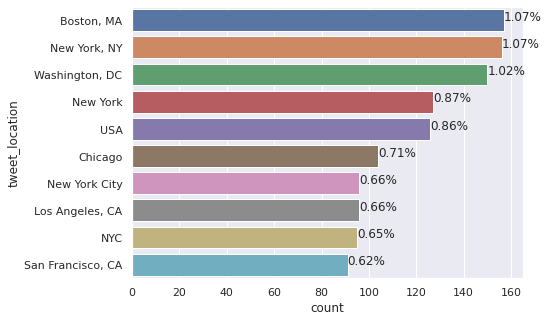

In [36]:
plt.figure(figsize = (7,5))
count_ploty('tweet_location', 10)

- Top 10 tweet locations are all in USA.

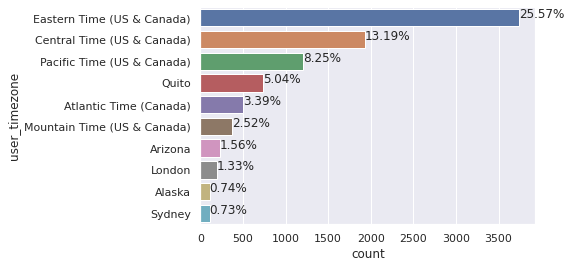

In [37]:
count_ploty('user_timezone', 10)

- Most of the top 10 user timezone are located at North America. About 5% are from Quito, Ecuador.

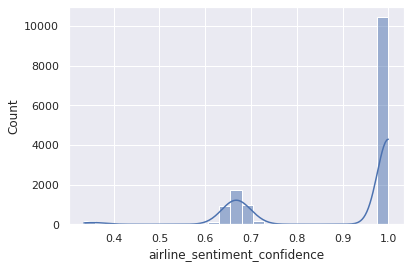

In [38]:
sns.histplot(df['airline_sentiment_confidence'], kde = True);

- `airline_sentiment_confidence` are mostly 1.0. But it's unclear what this feature exactly means.

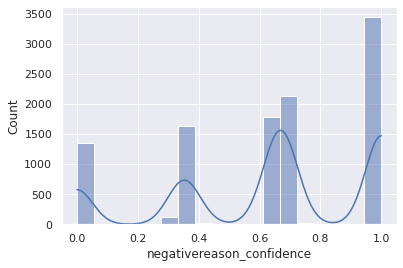

In [39]:
sns.histplot(df['negativereason_confidence'], kde = True);

- `negativereason_confidence` are mostly greater than 0.5. But it's unclear what this feature exactly means.

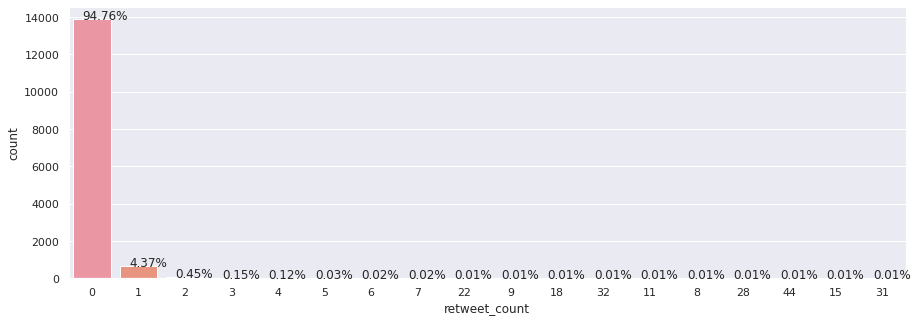

In [40]:
plt.figure(figsize = (15,5))
count_plotx('retweet_count', 0)

- Most of the tweets get 0 ~ 1 retweet. But some outliers could get as many as 44 retweets.

In [41]:
df[df.retweet_count == 44]

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,retweet_count,text,tweet_created,tweet_location,user_timezone,year,month,day,hour
11596,negative,1.0,Late Flight,1.0,US Airways,44,@USAirways 5 hr flight delay and a delay when ...,2015-02-17 20:06:21-08:00,NaN,Eastern Time (US & Canada),2015,2,17,20


In [42]:
df[df.retweet_count == 44].text.values

array(['@USAirways 5 hr flight delay and a delay when we land . Is that even real life ? Get me off this plane , I wanna go home 👠👠👠 (3 heel clicks)'],
      dtype=object)

- The one that got so many retweets is about a 5 hour delay flight with US Airways. It's probably from passengers who were delayed in this flight and full of frustration and anger.

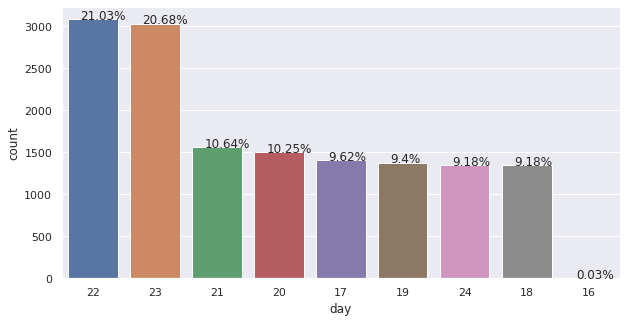

In [43]:
plt.figure(figsize = (10,5))
count_plotx('day', 0)

- Most of the data was collected during 2015-2-17 to 2015-2-24.

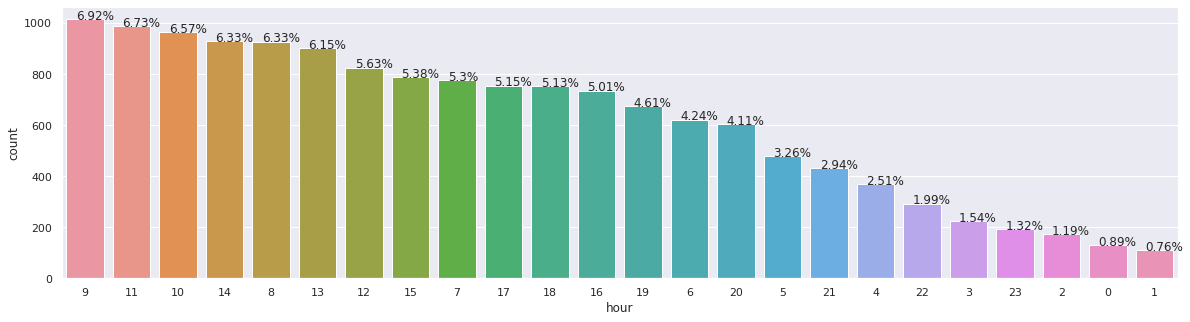

In [44]:
plt.figure(figsize = (20,5))
count_plotx('hour', 0)

- Most of the tweets were created during 7:00 - 18:00. Part of them were created during unusual time slots between 21:00 - 5:00.

## Bivariate Analysis
### `airline_sentiment` vs `airline`

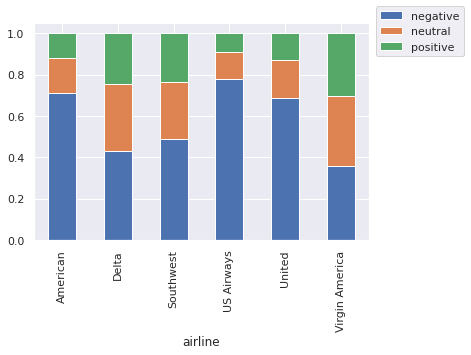

In [45]:
pd.crosstab(index = df.airline, columns = df.airline_sentiment, normalize = 'index').plot(kind = 'bar', stacked = True);
plt.legend(bbox_to_anchor = (1.3,1.1), loc = 'upper right');

- At least 70% of the tweets about `America`, `US Airways` and `United` are negative.
- `Virgin America` is popular among customers, with less than 40% negative feedbacks and about 30% positive feedbacks.

### `negativereason` vs `airline`

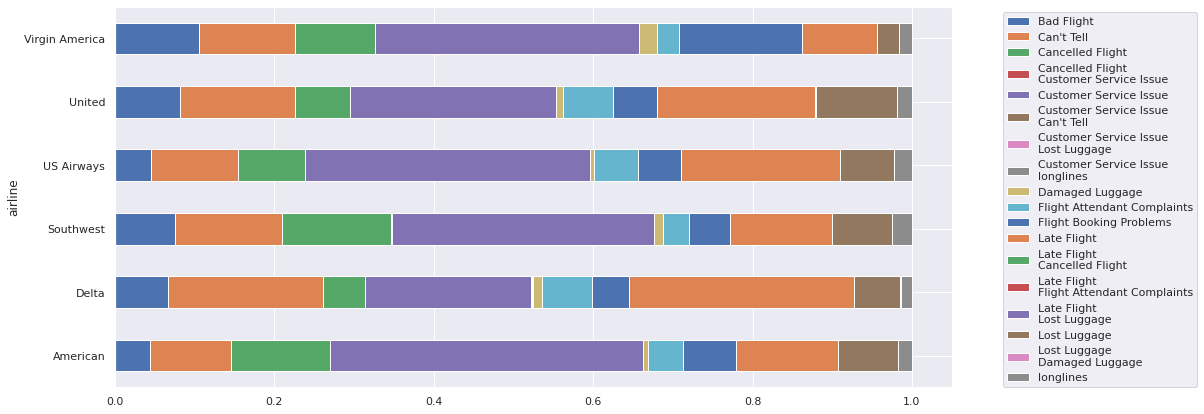

In [46]:
pd.crosstab(index = df.airline, columns = df.negativereason, normalize = 'index').plot(kind = 'barh', stacked = True, figsize = (15,7));
plt.legend(bbox_to_anchor = (1.3,1), loc = 'best');

- About 40% of the complaints about `American`/ `Southwest`/ `US Airways` are related to "Customer Service Issue".
- "Late Flight" is the #1 concern for `Delta`.
- For each airline except `Virgin America`, "Late Flight" and "Customer Service Issue" are two major issues.
- Besides "Customer Service Issue" being the #1 concern, "Flight Booking Problems" contributes to about 20% of the complaints about `Virgin America`.

### WordCloud for positive and negative sentiment

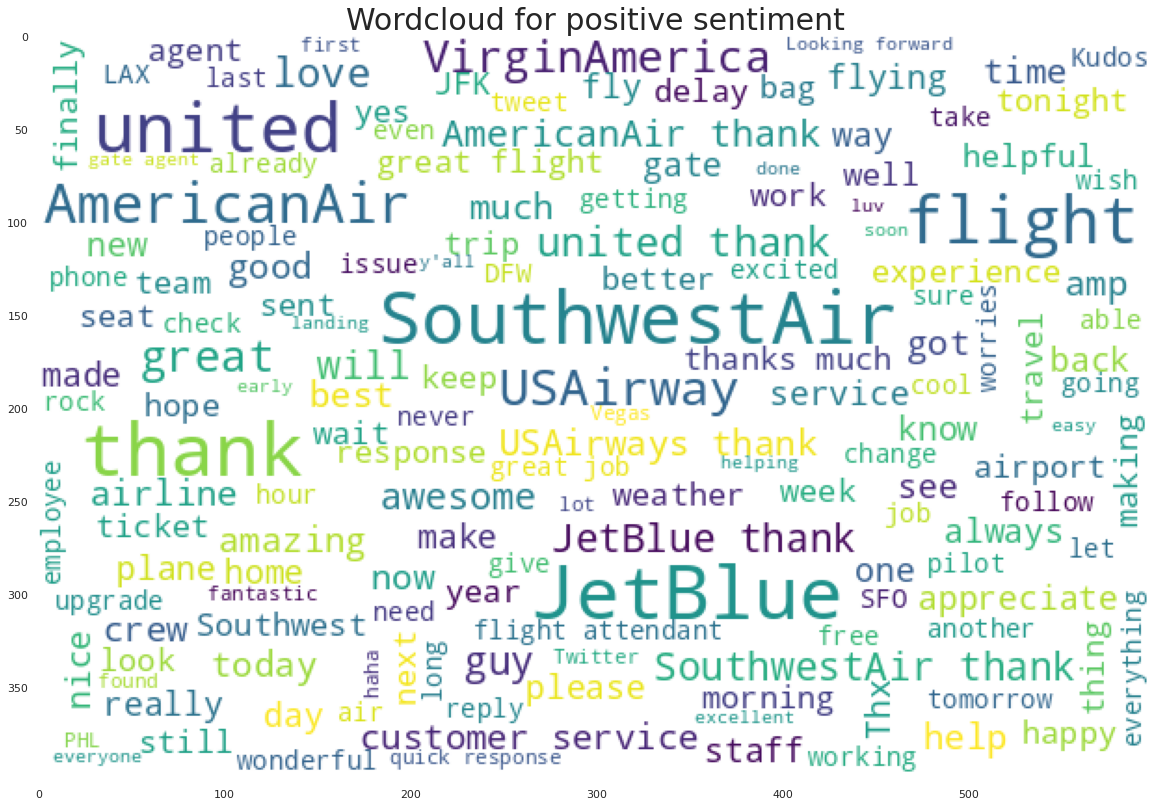

In [47]:
positive_text = df.loc[df['airline_sentiment'] == 'positive', 'text'].values
positive_text = ' '.join(positive_text)
plt.figure(figsize = (20, 20))
plt.grid(False)
plt.imshow(WordCloud(width=600, height=400,background_color = "white", 
                     max_font_size = 40,min_font_size = 10, max_words = 300, min_word_length = 3).generate(positive_text));
plt.title("Wordcloud for positive sentiment", fontsize = 30);

- In the wordcloud of positive sentiment, words that pop up frequently are: wonderful, thank, best, happy, great, amazing, love, helpful, appreciate, well, nice, fantastic, etc .

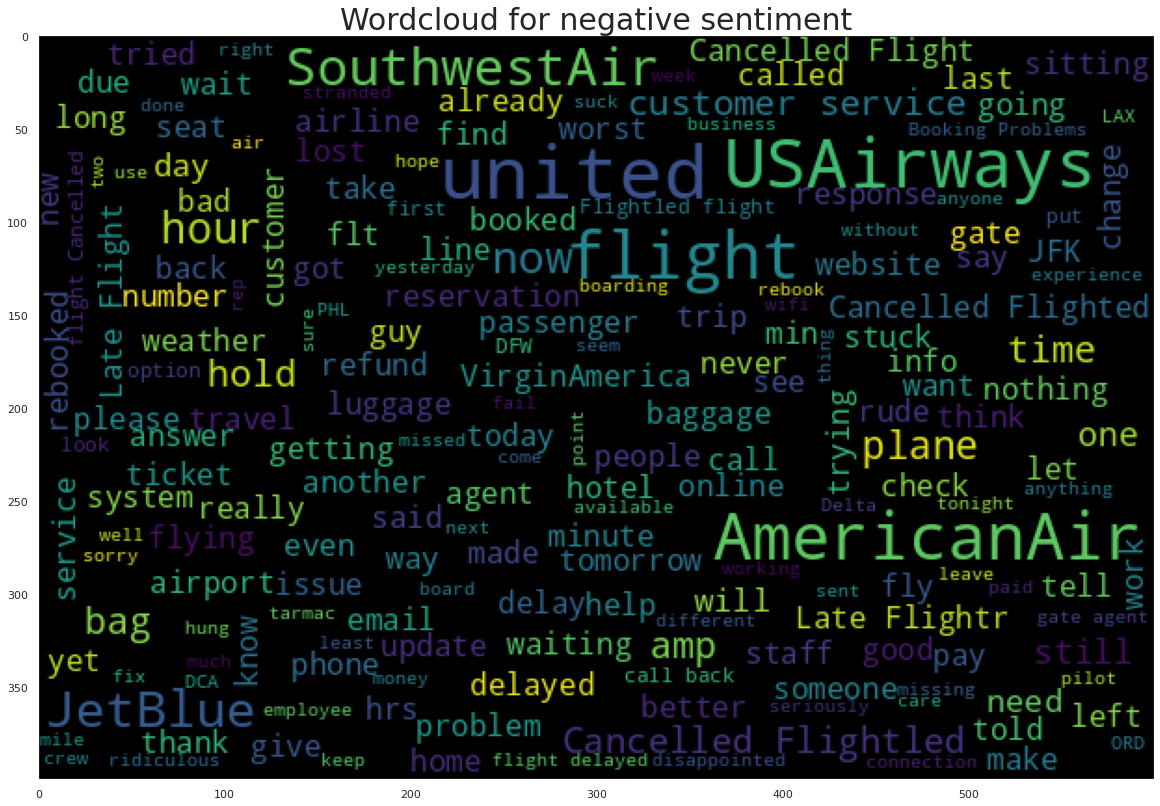

In [48]:
negative_text = df.loc[df['airline_sentiment'] == 'negative', 'text'].values
negative_text = ' '.join(negative_text)
plt.figure(figsize = (20, 20))
plt.grid(False)
plt.imshow(WordCloud(width=600, height=400,background_color = "black", 
                     max_font_size = 40,min_font_size = 10, max_words = 300, min_word_length = 3).generate(negative_text));
plt.title("Wordcloud for negative sentiment", fontsize = 30);

- In the wordcloud of negative sentiment, words that pop up frequently are: worst, rude, disappointed, problem, fail, refund, cancalled flight, late flight, customer service, booking problems, ridiculous, etc.

# Conclusion